# For the given Brain Size dataset:
>- compare VIQ fore female and male

In [75]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy import stats

# data = pd.read_csv('brain_size.csv')
data = pd.read_csv('brain_size.csv', sep=';', na_values='.') # sep and na_values cleans the data

data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


>- mean VIQ for female = 109.45
>- mean VIQ for male = 115.25

In [32]:
male_mean_viq = data[data['Gender'] == 'Male']['VIQ'].agg(np.mean)
male_mean_viq

115.25

In [31]:
female_viq = data[data['Gender'] == 'Female']['VIQ'].agg(np.mean)
female_mean_viq

109.45

# Steps:
1. Obtain the mean VIQ for the male and female samples
2. Can we accept that population average(mean) of VIQ are the same for male and female?
>- Hint: calculate the T-test for the means of two independent samples
>- If the p-value is smaller than the threshold, e.g 1%, 5% or 10%, then we can reject the null hypothesis of equal average (accept different population average)

In [55]:
# example of the Student's t-test
from scipy.stats import ttest_ind

data1= data[data['Gender'] == 'Male']['VIQ']
data2 = data[data['Gender'] == 'Female']['VIQ']
stat, p = ttest_ind(data1, data2)

print('stat=%.3f, p=%3f' % (stat, p))

if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.773, p=0.444529
Probably the same distribution


# Extend the above analysis of 'FSIQ', 'VIQ', 'Weight', 'Height' for male and female
> - Performance IQ (PIQ)
> - Verbal IQ (VIQ)
> - Full Scale Intelligence Quotient (FSIQ)

In [56]:
data.columns[2:7] # we are specifying which columns we want to use

Index(['FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height'], dtype='object')

In [57]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [62]:
# instructors code:

for category in data.columns[2:7]:
    ls = []
    for gender in data['Gender'].unique():
        ls.append(data[data['Gender'] == gender][category].dropna().values)
    stat, p = stats.ttest_ind(ls[0], ls[1])
    print('stat={}, p={}'.format(stat,p))
    print((np.mean(ls[0]), np.mean(ls[1])))
    
    if p > 0.05:
        print('Probably the female and male have the same distribution for {}'.format(category))
    else:
        print('Probably the female and male have the different distribution for {}'.format(category))

stat=-0.4026724743703011, p=0.6894456253897778
(111.9, 115.0)
Probably the female and male have the same distribution for FSIQ
stat=-0.7726161723275011, p=0.44452876778583217
(109.45, 115.25)
Probably the female and male have the same distribution for VIQ
stat=-0.15980113150762698, p=0.8738841403250049
(110.45, 111.6)
Probably the female and male have the same distribution for PIQ
stat=-4.870950921940696, p=2.227293018362118e-05
(137.2, 166.44444444444446)
Probably the female and male have the different distribution for Weight
stat=-6.280184459523685, p=2.623667704653113e-07
(65.765, 71.43157894736842)
Probably the female and male have the different distribution for Height


In [36]:
# example of the Student's t-test
from scipy.stats import ttest_ind

data1= data[data['Gender'] == 'Male']['FSIQ']
data2 = data[data['Gender'] == 'Female']['FSIQ']
stat, p = ttest_ind(data1, data2)

print('stat=%.3f, p=%3f' % (stat, p))

if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.403, p=0.689446
Probably the same distribution


In [40]:
# example of the Student's t-test
from scipy.stats import ttest_ind

data1= data[data['Gender'] == 'Male']['PIQ']
data2 = data[data['Gender'] == 'Female']['PIQ']
stat, p = ttest_ind(data1, data2)

print('stat=%.3f, p=%3f' % (stat, p))

if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.160, p=0.873884
Probably the same distribution


In [47]:
male_weight = data[data['Gender'] == 'Male']['Weight'].dropna() # Need to remove the NaN values 

In [48]:
female_weight = data[data['Gender'] == 'Female']['Weight'].dropna()

In [49]:
# example of the Student's t-test
from scipy.stats import ttest_ind

data1= male_weight
data2 = female_weight
stat, p = ttest_ind(data1, data2)

print('stat=%.3f, p=%3f' % (stat, p))

if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=4.871, p=0.000022
Probably different distributions


In [50]:
male_height = data[data['Gender'] == 'Male']['Height'].dropna()

In [51]:
female_height = data[data['Gender'] == 'Female']['Height'].dropna()

In [52]:
# example of the Student's t-test
from scipy.stats import ttest_ind

data1= male_height
data2 = female_height
stat, p = ttest_ind(data1, data2)

print('stat=%.3f, p=%3f' % (stat, p))

if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=6.280, p=0.000000
Probably different distributions


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24ffd1d0>,
      dtype=object)

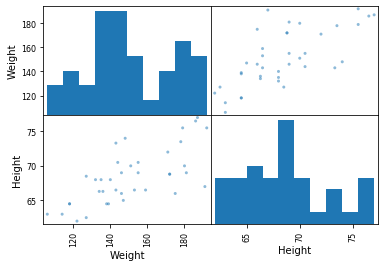

In [120]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[['Weight', 'Height']]) # correlation between height and weight
# taller person => heavier

In [72]:
df = pd.read_csv('Iris.csv')

df.describe()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
df.columns[:]

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Obtain the STD of Iris-Setosa for sepal length

In [87]:
# STD  or sigma
std = df[df['Species'] == 'Iris-setosa']['SepalLengthCm'].std()
std

0.3524896872134512

In [88]:
# Mean or x_bar
x_bar = df[df['Species'] == 'Iris-setosa']['SepalLengthCm'].mean()
x_bar

5.005999999999999

In [96]:
import pandas as pd
import numpy as np
import scipy.stats

x = df[df['Species'] == 'Iris-setosa']['SepalLengthCm'].tolist()
print(np.mean(x))

def ci_z(data_sample, significant_level, sigma):
    
    z_score = scipy.stats.norm.ppf(1-significant_level/2)
    L = np.mean(data_sample) - z_score*sigma/np.sqrt(len(data_sample)) # L = lowerbound
    U = np.mean(data_sample) + z_score*sigma/np.sqrt(len(data_sample)) # U = upperbound
    return L, U

def ci_t(data_sample, significant_level):
    t_score = scipy.stats.t.ppf(1-significant_level/2, len(data_sample) - 1)
    L = np.mean(data_sample) - t_score * np.std(data_sample, ddof=1) / np.sqrt(len(data_sample))
    U = np.mean(data_sample) + t_score * np.std(data_sample, ddof=1) / np.sqrt(len(data_sample))
    return L, U

print(ci_z(x, 0.05, 0.3525))
print(ci_t(x, 0.05)) # alpha = significant level (for example 0.05)

5.006
(4.908293780383348, 5.103706219616653)
(4.905823539430869, 5.106176460569132)


## Learning Objectives:

By the end of this lesson, students will be able to:

- Describe an outlier and how to remove outliers for univariate data
- Visualize the outliers through box-plots
- Describe how to use a Gaussian Mixture Model to fit a data distribution
- Understand correlation and visualize the correlation amongst features

## Outlier Detection

- **Outliers** are extreme values that can skew our dataset, sometimes giving us an incorrect picture of how things actually are in our dataset. 

- The hardest part of this is determining which data points are acceptable, and which ones constitute as "outliers".

## Activity: find and remove outliers if our dataset is Normal

When our sample data is close to normal distribution, the samples that are _three standard deviations away from the mean_ can be considered outliers.

**Task**: Write a function that first finds outliers for a normally distributed data, then remove them.

**Hint**: Data samples that are below `mean - 3*std` and above `mean + 3*std` are outliers for Normal distribution 

In [118]:
list = [1, 2, 1, 2, 1, 1, 1, 1, 600000]
def remove_outlier(data_sample):
    outliers = []
    
    mean = np.mean(data_sample)
    std = np.std(data_sample)
    remove_data = std*3
    
    below = mean - remove_data
    above = mean + remove_data
    
    for x in data_sample:
        if (x < below) or (x > above):
            print(outliers.append())

print(remove_outlier(list))

None


In [107]:
import numpy as np

list = [1, 2, 1, 1, 1, 1, 2, 600]

def find_remove_outlier(data_sample):
    # calculate summary statistics
    data_mean, data_std = np.mean(data), np.std(data)
    # define cut-off
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers, outliers_removed

print(find_remove_outlier([1, 2, 1, 1, 1, 2, 3, 600]))

## Interquartile range (IQR)

We use IQR for finding and removing outliers when the data has any kind of distribution

[John Tukey](https://en.wikipedia.org/wiki/John_Tukey) suggested to _calculate the range between the first quartile (25%) and third quartile (75%) in the data_, which is  the IQR.

## Activity:  IQR outlier detection and removal

**Task**: write a function to find and remove outliers based on IQR method for this data sample:

**Hint**: 

$Q_1$ is the first quartile (25%) = np.percentile (x,25)

$Q_3$ is the third quartile (75%) = np.percentile (x, 75)

IQR = Q3 - Q1

<img src="https://www.thoughtco.com/thmb/Q6bHgTs2QBF2pPuEGy0W9LgyrSU=/768x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/boxplotwithoutliers-5b8ec88846e0fb0025192f90.jpg"> 

<img src = "https://d2mvzyuse3lwjc.cloudfront.net/doc/en/UserGuide/images/Customizing_the_Box_Chart_Box_Tab_Controls/Customizing_the_Box_Chart_Box_Tab_Controls_4.png?v=2729">

`x = [norm.rvs(loc=5 , scale=1 , size=100), -5, 11, 14]`

In [108]:
import numpy as np
import scipy.stats

def find_remove_outlier_iqr(data_sample):
    # calculate interquartile range
    q25, q75 = np.percentile(data_sample, 25), np.percentile(data_sample, 75)
    iqr = q75 - q25
    print(iqr)
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers

y = np.array([-5, 11, 14])
x =  np.concatenate((scipy.stats.norm.rvs(loc=5 , scale=1 , size=100), y))
print(type(x))
print(find_remove_outlier_iqr(x))
print(scipy.stats.iqr(x))

<class 'numpy.ndarray'>
1.3242458186596657
[-5.0, 11.0, 14.0]
1.3242458186596657


## How we can visualy see the outlier?

**Answer**: Box plot use the IQR method to display data and outliers

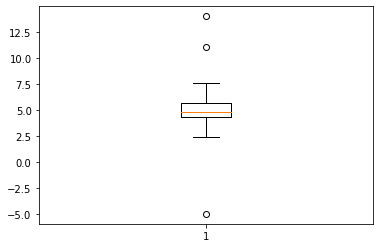

In [109]:
import matplotlib.pyplot as plt

plt.boxplot(x)

plt.show()